<a href="https://colab.research.google.com/github/nicolasero87/SongAttributes_1999-2019_Spotify_Nicolas_Roman/blob/main/20.%20Spotify%20Songs%20Atributes_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preentrega n° 1
#**Fundamento Ciencias de datos I**

---


###Alumno: Nicolas Román
####Comision 61600

###Prof.: Leonardo Ferreira da Silva
###Tutor: Gabriel Gudiño



#####Data Base: "songAttributes_1999-2019.csv"

#####Agosto 2024


# CONSIGNA
Identificar 1 dataset potencial con las siguientes características:
 i) al menos 2000 filas,
 ii) al menos 15 columnas.
Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
Identificar valores perdidos.
ormato

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoDS_ParteI_+Apellido.ipynb”



####Importacion de librerias y conexion a la carpeta de GitHub

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure

In [2]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

Cloning into 'PPL_ALTAS'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 92 (delta 51), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (92/92), 33.50 MiB | 7.32 MiB/s, done.
Resolving deltas: 100% (51/51), done.


# **DATA BASE 'ATRIBUTOS DE CANCIONES DE SPOTIFY'**
#Abstracto
documento: songAttributes_1999-2019.xlsx**. El mismo fue importado tambien en formato *.csv

Spotify Song Attributes

El data set elegido se trada de un conjunto de datos de 2017 canciones con atributos de la API de Spotify.
Cada fila representa una canción.
Hay 16 columnas:

13 columnas son atributos de la canción,
una columna para el nombre de la canción,
una para el artista,
y también tiene una columna llamada ‘LABEL’ que determina si al creador de la base de datos le gusta (1) o no le gusta (0) la canción.

Aquí están los 13 atributos de las canciones:

acousticness (acústica)
danceability (bailabilidad)
duration_ms (duración en milisegundos)
energy (energía)
instrumentalness (instrumentalidad)
key (clave/registro)
liveness (vivacidad)
loudness (sonoridad)
mode (modo)
speechiness (hablabilidad)
tempo (tempo)
time_signature (compás)
valence (valencia)

variables potencialmente interesantes:
1. artistas más repetidos en el archivo
2. qué clase de canciones prefiere el autor del data set
3 canciones más bailables y energáticas de la base de datos


In [3]:
#leo el data set
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [4]:
#impresion de las primeras 5 filas del data set
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
#tamaño del data set para saber si cumple con los requisitos exigidos ( al menos 2000 filas y al menos 15 columnas.)
df_2.shape
print("El dataset 'songAttributes_1999-2019.csv' cumple con los requisitos exigidos.")

El dataset 'songAttributes_1999-2019.csv' cumple con los requisitos exigidos.


In [6]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df_2.describe().round(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,1008.0,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,582.4,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.0,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,504.0,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.30,0.00
50%,1008.0,0.06,0.63,229261.00,0.72,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,1512.0,0.26,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,2016.0,1.00,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


A partir de esta descripción de las variables que componen el data set 'songAttributes_1999-2019.csv', podríamos ver algunas caracteristicas salientes: por ejemplo los ALTOS valores en promedio de Danceability (bailable) y Energy (energía) en contraposicion a los BAJOS valores de acústica (Acousticness) y e instrumentalidad (instrumentalness). ¿será que el autor del data set prefiere canciones más divertidas y bailables por sobre las melódicas y acústicas?

In [7]:
df_2.describe(include='object')

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


La descripción anterior nos anticipa que Drake es el artista más repetido del data set.

In [8]:
#Identificar valores perdidos.
df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


El resultado anterior es muy importante porque nos dice que no hay valores nulos. Es decir que no hay datos faltantes.

# Preguntas/hipótesis
interrogantes que surgen de la base de datos:
##1.¿hay algún artista que sobresalga de los restantes?
##2.¿qué clase de musica es la preferida para el autor de la base de datos, considerando las caracteristicas descriptas para cada canción?

#Objetivo
Usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Spotify Song Attributes.

El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

Se busca analizar el perfil de gusto musical del autor de la base de datos.

#Contexto analitíco
Explorar el data set Spotify Song Attributes mediante la aplicacion de métodos y visualización a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

In [9]:
#cuáles son los artistas ordenandolos por cantidad de veces mencionados
artist_counts = df_2['artist'].value_counts()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
print(artist_counts_sorted)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Stan Getz           1
Ray Bryant          1
Duke Ellington      1
John Mayer          1
Bleachers           1
Name: count, Length: 1343, dtype: int64


In [10]:
#serie con los primeros 5 artistas
top_5_artists_series = artist_counts_sorted.head(5)
print(top_5_artists_series)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: count, dtype: int64


Este método nos resume cuáles son los artistas Top 5 de la base de datos bajo análisis.

Text(-0.3, 26, 'Cantidad de Canciones')

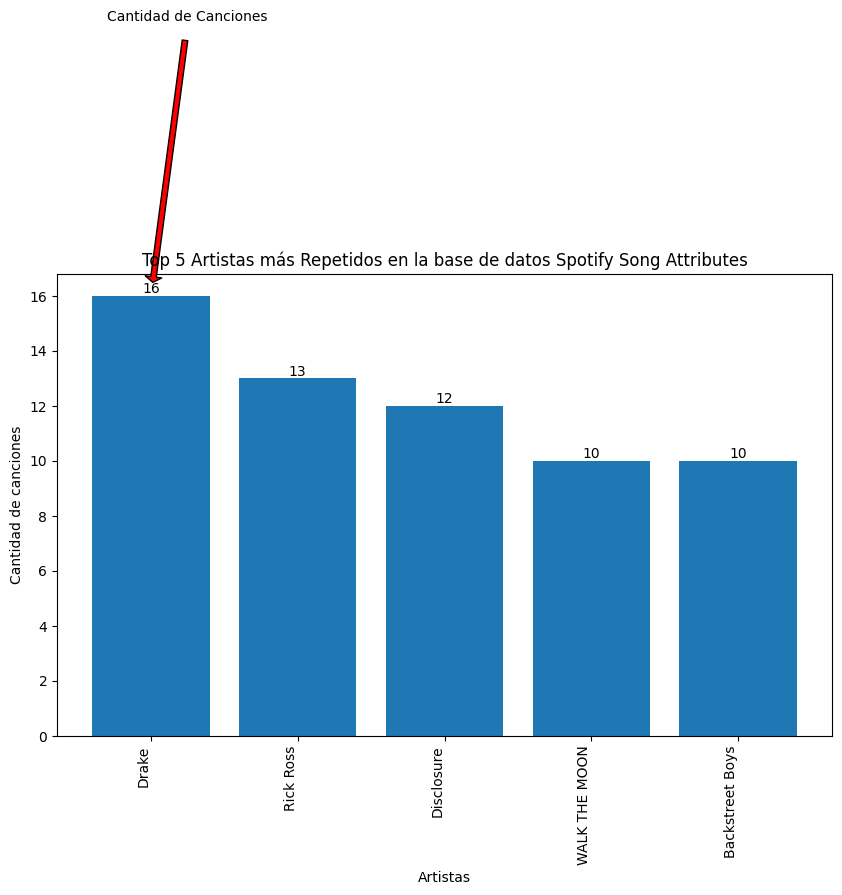

In [11]:
# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(artistas, conteos)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 Artistas más Repetidos en la base de datos Spotify Song Attributes')
for i, v in enumerate(conteos):
    plt.text(i, v, str(v), ha='center', va='bottom') #etiquetas con los valores
plt.xticks(rotation=90, ha='right')
x = 1
y = 2
x_offset = 0.5
y_offset = 0.5

# ubicar el indice de la  barra mas alta
highest_bar_index = conteos.argmax()

# ubicar la coordenada x de la  barra mas alta
x = highest_bar_index

# ubicar la coordenada y de la  barra mas alta
y = conteos[highest_bar_index]

# ajustar el ancho
x_offset = -0.3
y_offset = 10

plt.annotate('Cantidad de Canciones', xy=(x, y), xytext=(x + x_offset, y + y_offset),
             arrowprops=dict(facecolor='red', shrink=0.05, headlength=4)) # Adjust headlength as needed

Este gráfico es útil para comunicar de manera clara y concisa la frecuencia de los 5 artistas más repetidos en la base de datos "Spotify Song Attributes" y destacar al artista principal.
Con la flecha roja se apunta el valor de las canciones del artista más mencionado en el data set. (16 canciones).
Veamos ahora cómo es la proporcion entre los cinco artitas más mencionados en el data set para compararlos entre sí.



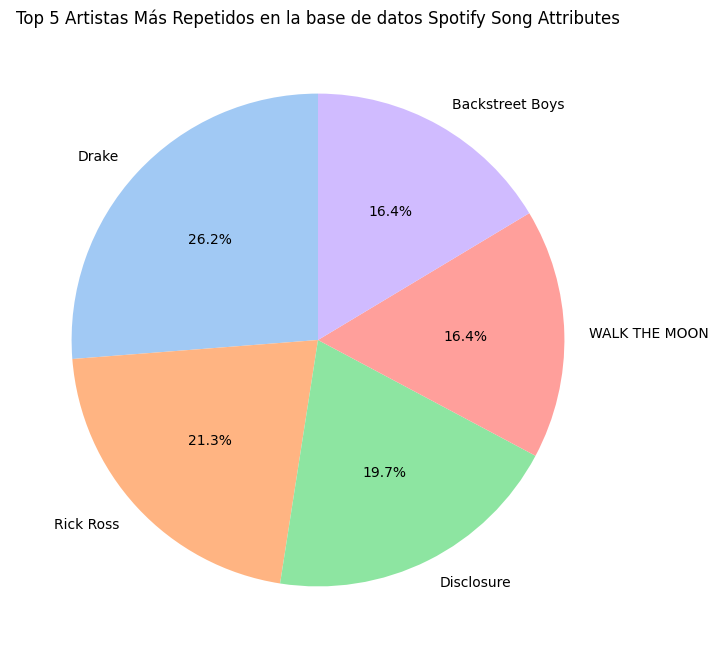

In [12]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn

# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

#  gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

Si bien se advierte que el artista Drake es el principal del top 5, los 4 restantes no se encuentran sustancialmente muy alejados del primero. Es una distribucion bastante proporcional.

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'.

In [13]:
#cuáles son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object


Ahora analicemos de tales canciones dónde se concentran los valores de las mismas dentro de la categoria 'danceability':

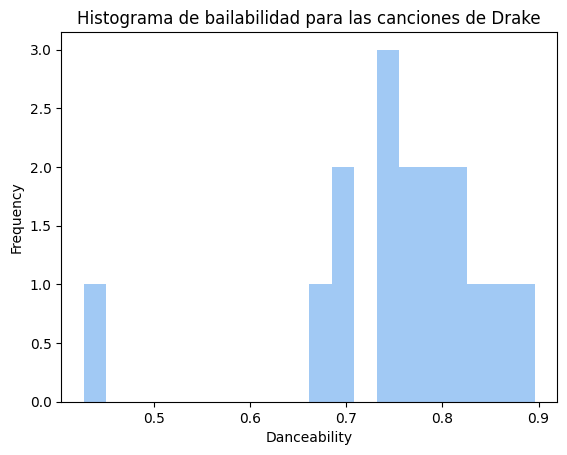

In [14]:
drake_danceability_df = df_2[df_2['artist'] == 'Drake'][['danceability']]
#print(drake_danceability_df)

plt.hist(drake_danceability_df['danceability'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Histograma de bailabilidad para las canciones de Drake')
plt.show()

Analizando el histograma de Danceability ´bailabilidad´ de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que las canciones del artista Drake (de este data set) tienden a poseer un alto grado de bailabilidad.

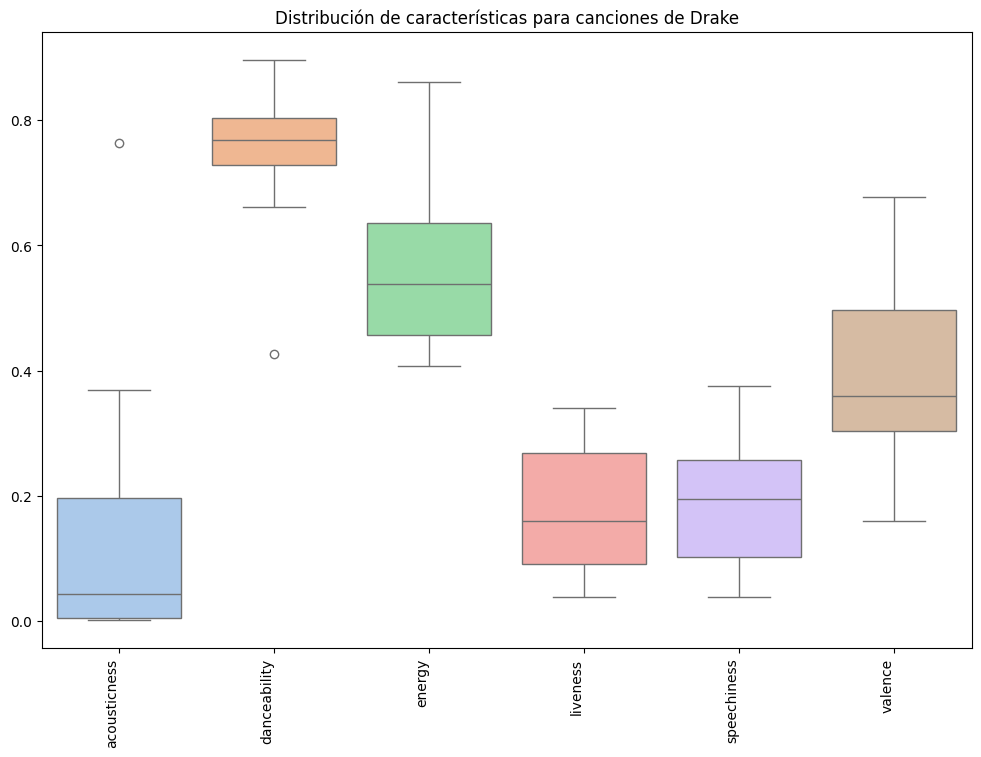

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Canciones de Drake
drake_songs = df_2[df_2['artist'] == 'Drake']

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(drake_songs)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta).
No hay canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas.
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
En este gráfico de cajas se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos).

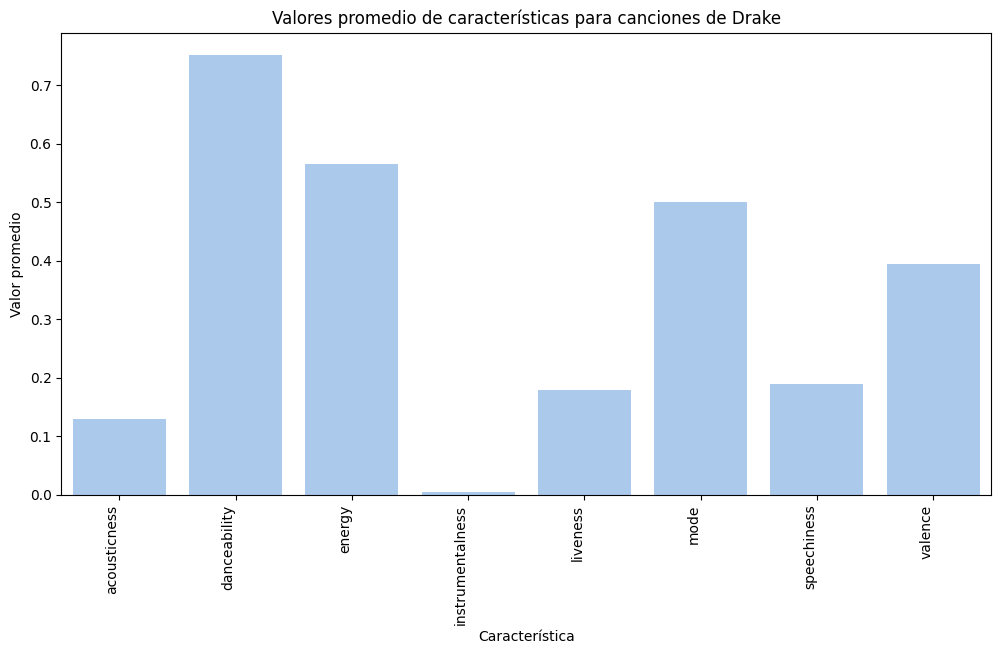

In [20]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar conjuntamente con los dos graficos anteriores ( de histograma y el de barras). Con las tres clases de gráficos se infiere que la caracteristica 'bailable', es donde más se concentran los valores y donde se observan los valores mas altos y menos dispersos.

Ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', y 'speechiness' usando grafico de radar.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre la variabilidad de su estilo musical ya que los gráficos tienen formas muy diferentes entre sí.

Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability').

Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad. Podria afirmarse que su música es generalmente enérgica y bailable.

Canciones atípicas: el gráfico que se destaca del resto por tener una forma o valor muy diferente es el de la cancion 'Best I ever had' (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual.

Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailabilidad'.

Teniendo en cuenta que la variable 'bailable' se repite en los análisis efectuados, ahora desearia saber dónde se concentran los datos haciendo un histograma para la base de datos en estudio. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso sólo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?. Veamos:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccion de las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Creacion del histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplazo los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del data set Spotify Song Attributes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y enérgicas, con bajos valores para canciones acústicas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas más repetidos en la base de datos, que ya habiamos obtenido más arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'Walk the Moon', 'Backstreet Boys']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=90, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artistas')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando TODA la base de datos, cuando se focaliza en los 5 artitas más repetidos, la caracteristica bailable varia entre 0.8 (valor máximo para 'Drake') a 0,45 (valor mínimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



In [ ]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

se advierte que el gráfico de barras agrupadas no es el mejor para evidenciar la diferencia apuntada en la conclusion anterior, (respecto a los valores promedio de 'danceability' y 'energy' para cada artista) ya que la columna de cantidad de canciones impide ver la variacion entre los artistas respecto de las variables bajo analisis. dicho en otras palabras, el gráfico NO  evidencia la conclusión anteriormente desarrollada. Intentemos hacer uno nuevo SIN la columna Cantidad de Canciones:

In [ ]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: analisis de ´Danceability' y 'Energy')
ax.legend()

Con el gráfico anterior se vuelve a evidenciar que los valores Danceability y Energy'(para el Top 5 de Artistas más Repetidos) son elevados y se muestra de mejor modo la diferencia de valores entre cada uno de ellos.


# ¿Como influye la variable Duración ('duration_ms') en el data set respecto de la caracteristica 'danceability'?
Ya hemos analizado cuáles son los artitas favoritos del autor del data set y que la característica distintiva de la base de datos y del artista favorito tiende a ser 'dancecability'.
Indaguemos seguidamente si hay relación entre la variable 'danceability' y la duración de las canciones que posee el data set.
Primero analizaremos usando el método describe de la columna 'duration_ms', teniendo en cuenta que la duración de las canciones del data set están expresadas en milisegundos.

In [ ]:
#repitamos el metodo describe
df_2.describe().round()

In [ ]:
#variable Duration_ms
df_2['duration_ms'] = df_2['duration_ms'].round(2)  # redondear a 2 decimales
descripcion_duracion = df_2['duration_ms'].describe(). round(2)
print(descripcion_duracion)

El tiempo expresado en milisegundos debe ser convertido a minutos para poder ser comprendido:

In [ ]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)  # Divide milisegundos (1000 * 60) para obtener minutos
descripcion_duracion = df_2['duration_min'].describe(). round(2)
print(descripcion_duracion)

Ahora vemos los datos más importantes del data set segun la duración en min:
la cancion más corta (0,27 min)
la cancion más extensa (16.74 min)
la duración promedio (4.11 min).
Vemos que la desviación estandar es de 1.37 minutos:
significa que aproximadamente el 68% de las canciones en el data set tienen duraciones dentro de 1.37 minutos por encima o por debajo de la duración promedio.
Alrededor del 95% de las canciones caen dentro de dos desviaciones estándar (2 * 1.37 = 2.74 minutos) de la media.
Casi todas (99.7%) de las canciones están dentro de tres desviaciones estándar (3 * 1.37 = 4.11 minutos) de la duración promedio.

In [ ]:
# Encontrar el indice de la fila con la menor duración en minutos
index_min = df_2['duration_min'].idxmin()

# Encontrar el indice de la fila con la mayor duración en minutos
index_max = df_2['duration_min'].idxmax()

# obtener ahora el titulo de la canción, la duración y el artista correspondiente a tales índices
song_min = df_2.loc[index_min, 'song_title']
duration_min = df_2.loc[index_min, 'duration_min']
artist_min = df_2.loc[index_min, 'artist']

song_max = df_2.loc[index_max, 'song_title']
duration_max = df_2.loc[index_max, 'duration_min']
artist_max = df_2.loc[index_max, 'artist']


print(f"La canción con la menor duracion es: '{song_min}', interpretada por el artista: '{artist_min}' con una duración de {round(duration_min,2)} minutos)")

print(f"La canción con la mayor duracion es: '{song_max}', interpretada por el artista: '{artist_max}' con una duración de {round(duration_max,2)} minutos)")

Ya vimos cuál es la canción más extensa, la más corta, la duración promedio y algo acerca de la desviación estandar de la duración. Ahora podríamos representarlo en un histograma: ¿dónde se concentran la mayoría de las canciones de la base de datos dentro de 'duración'?(expresado ahora en Minutos y no en Milisegundos)

In [ ]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2['duration_min'], bins=20)
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de las canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()


Promedio de duración de las canciones del data set:

In [ ]:
promedio_duracion_minutos = df_2['duration_min'].mean()
promedio_redondeado = round(promedio_duracion_minutos, 2)
print('El promedio de las canciones del data set es de \033[1m\033[3;35m', promedio_redondeado, '\033[0m minutos.')

Vemos que el resultado del cálculo promedio es consecuente con el gráfico de histograma. Ahora veamos lo mismo pero mediante un gráafico de Cajas

In [ ]:
import matplotlib.pyplot as plt

# Calcular los límites del eje x
min_valor = df_2['duration_min'].min()
max_valor = df_2['duration_min'].max()

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['duration_min'], vert=False, patch_artist=True)
plt.xlabel('Duración en minutos')
plt.title('Gráfico de cajas de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)


# Ajustar los límites del eje x
plt.xlim(min_valor - 0.1, max_valor + 0.1)  # Ajusta los valores -0.5 y +0.5 según sea necesario

plt.show()


Con este gráfico de cajas de la duración de las canciones, se puede  analizar varios aspectos de la distribución de los datos del data set:

1. Mediana: La línea dentro de la caja representa la mediana, es decir, el valor que divide la distribución en dos mitades iguales. Demuestra dónde se encuentra la duración típica de las canciones en el dataset. (cercana a los 4 minutos)

2. Cuartiles: Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3). Estos valores dividen la distribución en cuatro partes iguales. La distancia entre Q1 y Q3 (el rango intercuartil)  indica la dispersión de la mitad central de los datos.

3. Rango: Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos, excluyendo posibles valores atípicos. Se puede observar la duración mínima y máxima de las canciones dentro de este rango.

4. Valores atípicos: Los puntos individuales fuera de los bigotes representan posibles valores atípicos, es decir, canciones con duraciones inusualmente largas o cortas en comparación con el resto de la distribución.

Veamos ahora cómo quedaria representado mediante el método de puntuación z el gráfico de cajas:

##Diagrama de caja de puntuaciones Z

In [ ]:
from scipy import stats
df_2['z_score_duration'] = stats.zscore(df_2['duration_min'])

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['z_score_duration'], vert=False, patch_artist=True)
plt.xlabel('Z-score de Duración')
plt.title('Gráfico de cajas de duración de canciones (Z-scores)')
plt.show()

Al calcular las puntuaciones z, se transforman los valores de 'duration_min' en una distribución normal estándar con una media de 0 y una desviación estándar de 1.

Esto permite identificar valores atípicos en función de cuántas desviaciones estándar están lejos de la media.

El diagrama de caja de puntuaciones z representa visualmente la distribución de estos valores estandarizados, lo que facilita la identificación de posibles valores atípicos. En este caso los que estan por debajo de -2 y los que se hallan mas alla de 4.

#Combinación de variables analizadas hasta ahora.
Ya analizamos en la primer parte las caracteristicas de las canciones y descubrimos la preponderancia de las características 'danceability' y 'energy'.

Seguidamente analizamos acerca de la duración de las canciones.

Ahora veamos cuál es la correlación entre tales variables entre sí representándolas mediante graficos de dispersión.

##Gráfico de dispersión: Duración y Danceability




In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['danceability'])
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos ahora como quedaria representado en un gráfico de dispersión de puntos respecto de la variable 'Energy'

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['energy'], color='red')
plt.xlabel('Duración en minutos')
plt.ylabel('Energy')
plt.title('Gráfico de dispersión: Duración y Energy')

# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos las dos representaciones juntas usando subplots en Matplotlib. Lo que permitirá crear dos gráficos en una misma figura. Esto permite una comparación visual directa entre las dos relaciones.

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Crea dos subplots en una fila

# Gráfico 1: Duración vs. Danceability
ax1.scatter(df_2['duration_min'], df_2['danceability'])
ax1.set_xlabel('Duración en minutos')
ax1.set_ylabel('Danceability')
ax1.set_title('Duración y Danceability')


# Aplica las marcas al eje x
plt.xticks(marcas_x)
# Gráfico 2: Duración vs. Energy
ax2.scatter(df_2['duration_min'], df_2['energy'], color='red')
ax2.set_xlabel('Duración en minutos')
ax2.set_ylabel('Energy')
ax2.set_title('Duración y Energy')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Insights:


*   Duración y Bailabilidad
Se observa una concentración de canciones bailables (de 0.5 a 0.8) con una duracion aprox. de 4 min.

*   Duración y Energía
Se observa una concentración de canciones energicas (de 0.6 a 10) con una duracion aprox. de 4 min.


Ahora veamos cuál es la influencia de la variable 'energy' en la variable 'danceability' dentro de un solo gráfico (donde la relación entre la duración y 'danceability' se representa mediante la posición de los puntos, y la variable 'energy' se mapea al color de los puntos).
Esto permite visualizar la influencia de 'energy' en la relación entre duración y 'danceability' en un solo gráfico.
Veamos:

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Aqui podemos observar que la mayoria de las canciones con altos niveles de danceability tienen una duracion semejante al promedio de las canciones del data set (3,75 / 4 Min.). Y que el valor 'energy' que más influye se encuentra entre 0,6 y 0,8.

#EDA EXPLORATORY DATA ANALYSIS (ETA)
1. Atributos distinguidos  (Artistas más mencionados, Top 5)
2. Análisis Univariados (características de las canciones del artista más mencionado y de la variable tiempo)
3. Analisis Bi/Multi Variados (relacion entre las variables tiempo con 'danceability' y 'energy')
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers
6. Realizar Engineering

A fines de empezar a hacer un analisis exploratorio de la base de datos 'Atributos de las canciones de Spotify' debemos hacer una matriz de correlacion con los valores numericos seleccionando las siguientes columnas: 'acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness', 'key', 'liveness', 'loudness','mode', 'speechiness', y 'valence'.

In [16]:
# Seleccion de columnas deseadas traer al análisis
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

# Calcular la correlación
correlation_matrix = df_selected.corr()

# imprimir la correlación
print(correlation_matrix)

                  acousticness  danceability  duration_ms    energy  \
acousticness          1.000000     -0.179894     0.071536 -0.646319   
danceability         -0.179894      1.000000     0.004695  0.038557   
duration_ms           0.071536      0.004695     1.000000 -0.144473   
energy               -0.646319      0.038557    -0.144473  1.000000   
instrumentalness      0.144397     -0.130561     0.305403 -0.122890   
key                  -0.081037      0.022325     0.023570  0.072886   
liveness             -0.117126     -0.132044     0.023203  0.217435   
loudness             -0.562021      0.104362    -0.273798  0.762177   
mode                  0.068028     -0.047867    -0.074806 -0.070263   
speechiness          -0.099893      0.142661    -0.079562  0.093102   
valence              -0.152227      0.442061    -0.120030  0.278383   

                  instrumentalness       key  liveness  loudness      mode  \
acousticness              0.144397 -0.081037 -0.117126 -0.562021  0.0

y ahora es conveniente ver esta matriz de correlacion en un heatmap:

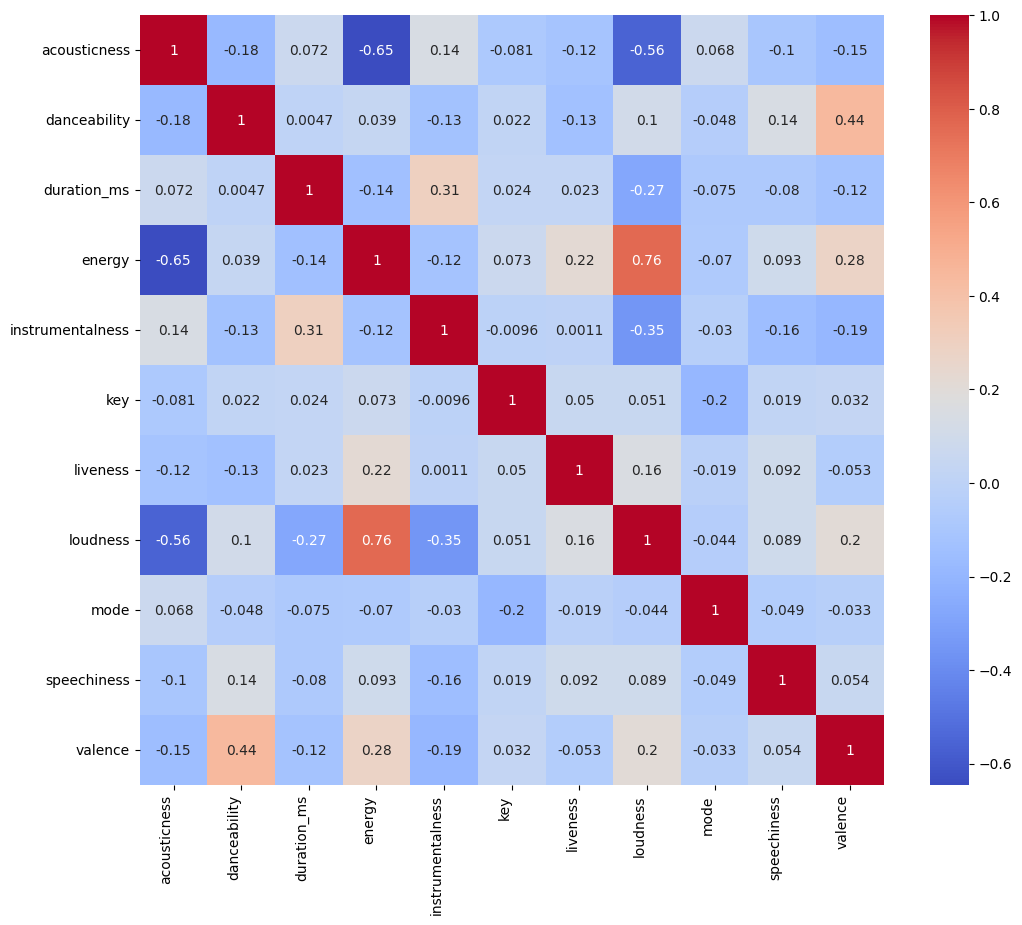

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the size of the heatmap.
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.show()

#Preguntas de interés que surgen del mapa de calor:

Mediante este heatmap podemos considerar lo siguiente teniendo en cuenta una correlacion positiva y otra negativa:


---


1. **Hipótesis sobre la correlación positiva entre loudness y energy:**


# Hipótesis:



> # ***“A medida que aumenta la sonoridad (loudness) de una canción, también aumenta su energía (energy).”***


Justificación:

Esta hipótesis se basa en la idea de que canciones más fuertes y sonoras (con mayor loudness) tienden a ser más energéticas, lo cual podría reflejarse en una mayor actividad instrumental y vocal.


---



2. **Hipótesis sobre la correlación negativa entre energy y acousticness:**

#Hipótesis:



> # ***“A medida que aumenta la energia (energy) de una canción, disminuye su acústica (acousticness).”***




Justificación:

Esta hipótesis sugiere que canciones más energéticas tienden a utilizar más instrumentos electrónicos y menos acústicos, lo que reduce la acustica (acousticness).

# Modelado

utilizaré 2 técnicas de machine learning en el modelado de mis hipótesis:



1.   Regresión Lineal
2.   Modelos de Árboles de Decisión



# **Regresión Lineal**

* Pasos:

1. Preparación de Datos:
los mismos ya se encuentran limpios y normalizados. Ya vimos mas arriba que no
habia datos nulos-

2. Division de los datos en conjuntos de entrenamiento y prueba.

3. Entrenamiento del Modelo:
Usando la librería scikit-learn en Python.

#Entrenamiento del modelo

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos
X = df_2[['loudness', 'acousticness']]
y = df_2['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

#Evaluación del modelo de regresión lineal




In [23]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f'R²: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')


R²: 0.672808218952013
MSE: 0.015173512398408034


Los resultados (R² = 0.67 y MSE = 0.015) sugieren que el modelo tiene un ajuste de moderado a bueno, lo que explica una cantidad decente de varianza en los datos y tiene un error de predicción relativamente bajo.

#**Modelos de Árboles de Decisión**
* Pasos:

1. Preparación de Datos:
los mismos ya se encuentran limpios y normalizados. Ya vimos mas arriba que no
habia datos nulos-

2. Division de los datos en conjuntos de entrenamiento y prueba.

3. Entrenamiento del Modelo:
Usando la librería scikit-learn para implementar arboles de decision.

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar el modelo
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

#Evaluación del modelo de Arboles de Decisión:

In [26]:
y_tree_pred = tree_model.predict(X_test)
print(f'R²: {r2_score(y_test, y_tree_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_tree_pred)}')


R²: 0.3312913856699162
MSE: 0.03101134881188119


Se observa que el modelo de arboles de decsion tiene un valor R2 mas bajo y un MSE más alto que el modelo de regresion lineal. lo que indica que éste ultimo es la mejor herramienta para predecir.